In [1]:
%matplotlib widget
#%matplotlib inline

In [2]:
# use standard rayoptics environment
from rayoptics.environment import *

import ipywidgets as widgets

In [3]:
import rayoptics.seq.twoconicmirrors as tcm

def apply_conics(opt_model, fct, parax_model):
    cc_m1, cc_m2 = fct(parax_model)
    opt_model.seq_model.ifcs[1].profile.cc = cc_m1
    opt_model.seq_model.ifcs[2].profile.cc = cc_m2
    opt_model.update_model()

In [4]:
root_pth = Path(rayoptics.__file__).resolve().parent

In [5]:
app = AppManager(None)

# Create a new model

In [6]:
opm = app.model = OpticalModel()

sm  = opm['seq_model']
osp = opm['optical_spec']
pm = opm['parax_model']
em = opm['ele_model']
pt = opm['part_tree']
ar = opm['analysis_results']

## Define first order aperture and field for system

In [7]:
osp.pupil = PupilSpec(osp, key=['image', 'f/#'], value=10.)
osp.field_of_view = FieldSpec(osp, key=['image', 'height'], flds=[0., 0.5])

## Define interface and gap data for the sequential model

In [8]:
sm.gaps[0].thi=1e10

In [9]:
opm.add_mirror(label='M1', profile=Conic, c=-0.01, t=-33.)
opm.add_mirror(label='M2', profile=Conic, c=-0.01, t=50.)
sm.list_model()

              c            t        medium     mode   zdr      sd
  Obj:     0.000000  1.00000e+10       air             1  6.6000e+07
    1:    -0.010000     -33.0000       air    reflect -1      2.5002
    2:    -0.010000      50.0000       air    reflect  1      1.0678
  Img:     0.000000      0.00000                       1      1.5684


## Update the model

In [10]:
opm.update_model()

In [11]:
sm.list_model()

              c            t        medium     mode   zdr      sd
  Obj:     0.000000  1.00000e+10       air             1  6.6000e+07
    1:    -0.010000     -33.0000       air    reflect -1      2.5002
    2:    -0.010000      50.0000       air    reflect  1      1.0678
  Img:     0.000000      0.00000                       1      1.5684


In [12]:
pt.list_model()

root
├── Object
├── M1
├── M2
└── Image


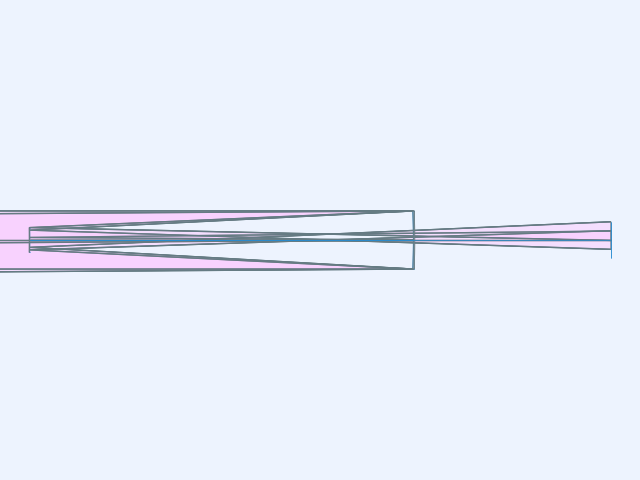

In [13]:
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=opm,
                        do_draw_rays=True, do_paraxial_layout=False).plot()

## Build the paraxial model and list

In [14]:
pm.list_model()

           ax_ht        pr_ht       ax_slp       pr_slp         power          tau        index    type
 0:            0       -1e+08      2.5e-10         0.01             0        1e+10      1.00000    dummy
 1:          2.5            0        -0.05         0.01          0.02           33     -1.00000    reflect
 2:         0.85         0.33       -0.033       0.0166         -0.02           50      1.00000    reflect
 3:         -0.8         1.16       -0.033       0.0166             0            0      1.00000    dummy


In [15]:
pm.first_order_data()

efl               75.76
ffl              -125.8
pp1                 -50
bfl               25.76
ppk                  50
f/#               15.15
m            -7.576e-09
red           -1.32e+08
obj_dist          1e+10
obj_ang          0.5729
enp_dist             -0
enp_radius          2.5
na obj          2.5e-10
n obj                 1
img_dist          25.76
img_ht           0.7576
exp_dist         -44.12
exp_radius        1.506
na img         -0.03298
n img                 1
optical invariant        0.025


In [16]:
opm.save_model('TwoMirror')

In [17]:
sm.list_model()

              c            t        medium     mode   zdr      sd
  Obj:     0.000000  1.00000e+10       air             1  6.6000e+07
    1:    -0.010000     -33.0000       air    reflect -1      2.5002
    2:    -0.010000      50.0000       air    reflect  1      1.0678
  Img:     0.000000      0.00000                       1      1.5684


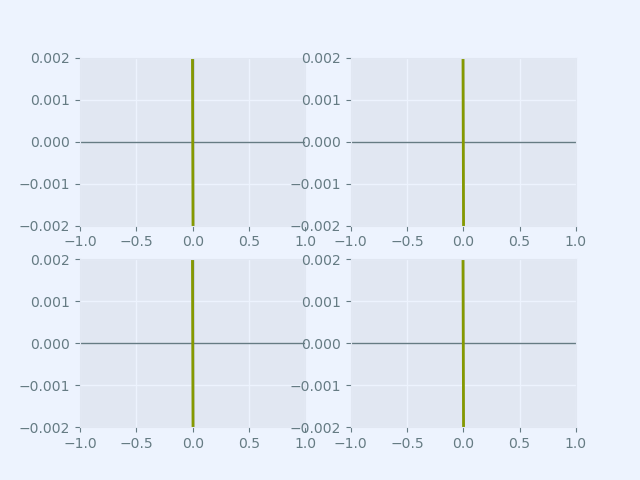

In [18]:
abr_plt = plt.figure(FigureClass=RayFanFigure, opt_model=opm, data_type='Ray',
                     scale_type=Fit.User_Scale, user_scale_value=0.002).plot()

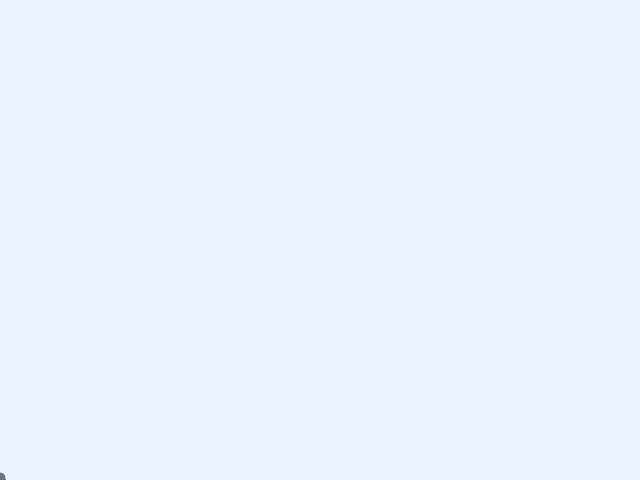

In [19]:
yybar_plt = plt.figure(FigureClass=InteractiveDiagram, opt_model=opm, dgm_type='ht')
def refresh_yybar():
    opm.update_model()
    yybar_plt.refresh()
    return yybar_plt

yybar_plt.refresh_gui=refresh_yybar

In [20]:
vertex=3
pm.apply_ht_dgm_data(vertex, (0.5, 0.0))
pm.paraxial_lens_to_seq_model()

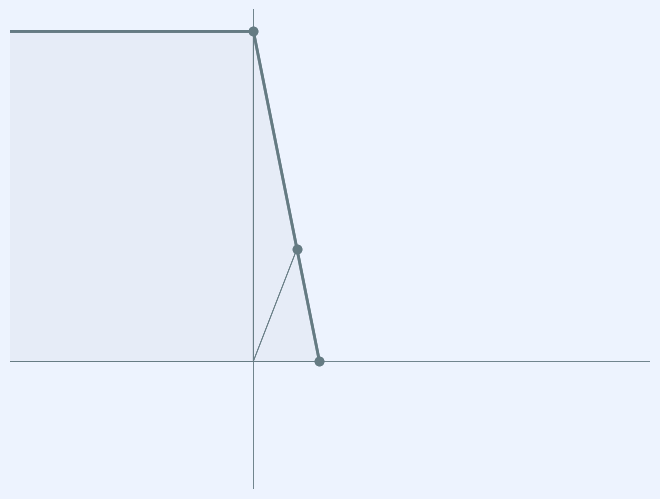

In [21]:
refresh_yybar()
yybar_plt.plot()

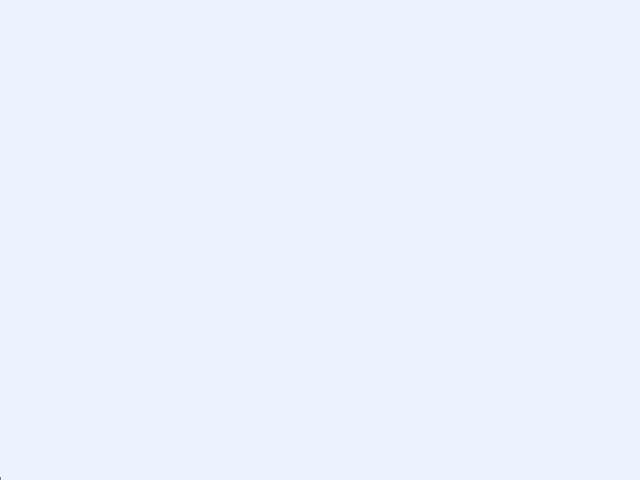

In [22]:
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=opm, do_draw_rays=True, do_paraxial_layout=False)

In [23]:
pm.list_model()

           ax_ht        pr_ht       ax_slp       pr_slp         power          tau        index    type
 0:            0       -1e+08      2.5e-10         0.01             0        1e+10      1.00000    dummy
 1:          2.5            0        -0.05         0.01          0.02           33     -1.00000    reflect
 2:         0.85         0.33        -0.05         0.01 -4.336809e-18           17      1.00000    reflect
 3:  1.11022e-16          0.5        -0.05         0.01             0            0      1.00000    dummy


In [24]:
pm.first_order_data()

efl                  50
ffl                 -50
pp1           -1.11e-14
bfl                  17
ppk                  33
f/#                  10
m                -5e-09
red              -2e+08
obj_dist          1e+10
obj_ang          0.5729
enp_dist             -0
enp_radius          2.5
na obj          2.5e-10
n obj                 1
img_dist             17
img_ht              0.5
exp_dist            -33
exp_radius          2.5
na img         -0.04994
n img                 1
optical invariant        0.025


In [25]:
vertex=2
pm.apply_ht_dgm_data(vertex, (0.2178/1.5, 2.25/1.5))
pm.paraxial_lens_to_seq_model()

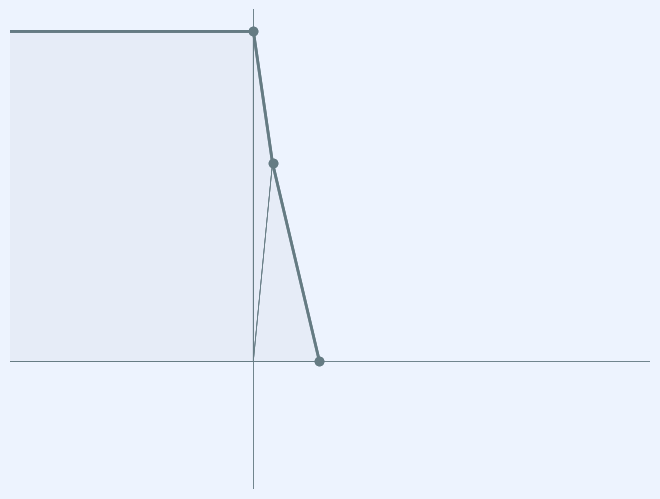

In [26]:
refresh_yybar()
yybar_plt.plot()

In [27]:
pm.list_model()

           ax_ht        pr_ht       ax_slp       pr_slp         power          tau        index    type
 0:            0       -1e+08      2.5e-10         0.01             0        1e+10      1.00000    dummy
 1:          2.5            0   -0.0688705         0.01    0.02754821        14.52     -1.00000    reflect
 2:          1.5       0.1452        -0.05    0.0118267   -0.01258035           30      1.00000    reflect
 3:  6.66134e-16          0.5        -0.05    0.0118267             0            0      1.00000    dummy


In [28]:
pm.first_order_data()

efl                  50
ffl              -59.13
pp1              -9.133
bfl                  30
ppk                  20
f/#                  10
m                -5e-09
red              -2e+08
obj_dist          1e+10
obj_ang          0.5729
enp_dist             -0
enp_radius          2.5
na obj          2.5e-10
n obj                 1
img_dist             30
img_ht              0.5
exp_dist         -12.28
exp_radius        2.114
na img         -0.04994
n img                 1
optical invariant        0.025


In [29]:
sm.list_model()

              c            t        medium     mode   zdr      sd
  Obj:     0.000000  1.00000e+10       air             1  1.0000e+08
    1:    -0.013774     -14.5200       air    reflect -1      2.5004
    2:    -0.006290      30.0000       air    reflect  1      1.6458
  Img:     0.000000      0.00000                       1     0.50261


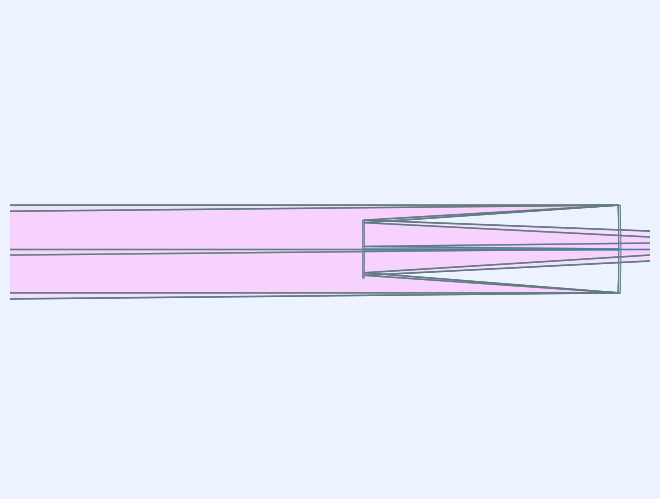

In [30]:
layout_plt.refresh()

In [31]:
opm.save_model('TwoMirror')

# Spherical Two Mirror

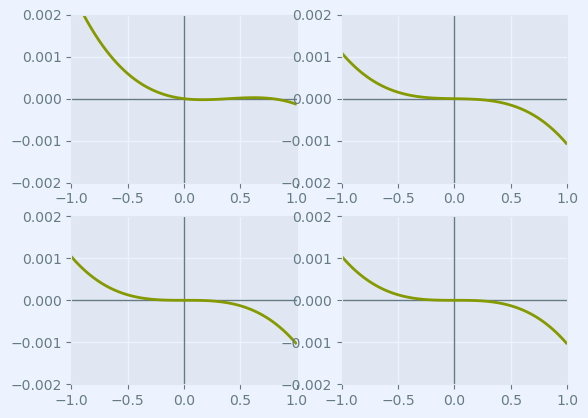

In [32]:
abr_plt.refresh()

In [33]:
# compute 3rd order aberrations
ax_ray, pr_ray, fod = ar['parax_data']
u_last = ax_ray[-1][mc.slp]
central_wv = opm.nm_to_sys_units(sm.central_wavelength())
n_last = pm.sys[-1][mc.indx]
to_df = compute_third_order(opm)

tr_df=to_df.apply(to.seidel_to_transverse_aberration, axis='columns', args=(n_last,u_last))
out = widgets.Output()
wv_df=to_df.apply(to.seidel_to_wavefront, axis='columns', args=(central_wv,))
with out:
    display(to_df)
    display(wv_df)
display(out)

fcv=to.seidel_to_field_curv(to_df.loc['sum'], n_last, fod.opt_inv)

Output()

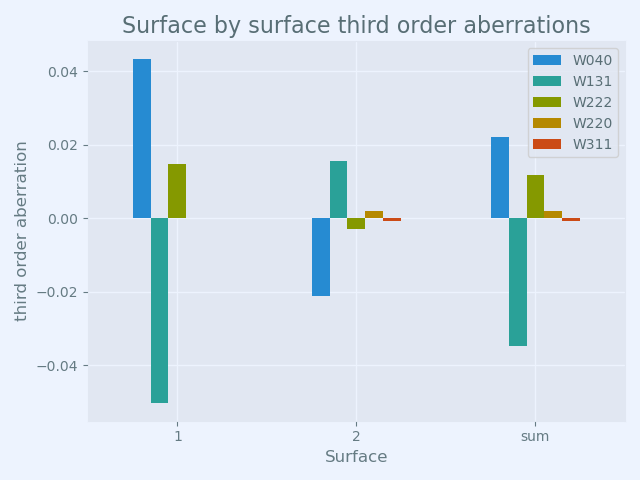

In [34]:
# display bar chart
fig, ax = plt.subplots()
ax.set_xlabel('Surface')
ax.set_ylabel('third order aberration')
ax.set_title('Surface by surface third order aberrations')
wv_df.plot.bar(ax=ax, rot=0)
ax.grid(True)
fig.tight_layout()

# Dall-Kirkham Two Mirror

In [35]:
apply_conics(opm, tcm.dall_kirkham, pm)

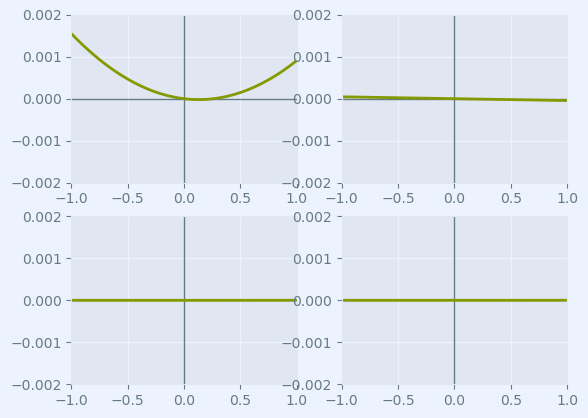

In [36]:
abr_plt.refresh()

In [37]:
opm.save_model('Dall_Kirkham')
sm.list_surfaces()

0 Surface(lbl='Obj', profile=Spherical(c=0.0), interact_mode='dummy')
1 Surface(profile=Conic(c=-0.013774104767630852, cc=-0.5102399014062445), interact_mode='reflect')
2 Surface(profile=Conic(c=-0.0062901746441689655, cc=0.0), interact_mode='reflect')
3 Surface(lbl='Img', profile=Spherical(c=0.0), interact_mode='dummy')


In [38]:
# compute 3rd order aberrations
ax_ray, pr_ray, fod = ar['parax_data']
u_last = ax_ray[-1][mc.slp]
central_wv = opm.nm_to_sys_units(sm.central_wavelength())
n_last = pm.sys[-1][mc.indx]
to_df = compute_third_order(opm)

tr_df=to_df.apply(to.seidel_to_transverse_aberration, axis='columns', args=(n_last,u_last))
out = widgets.Output()
wv_df=to_df.apply(to.seidel_to_wavefront, axis='columns', args=(central_wv,))
with out:
    display(to_df)
    display(wv_df)
display(out)

fcv=to.seidel_to_field_curv(to_df.loc['sum'], n_last, fod.opt_inv)

Output()

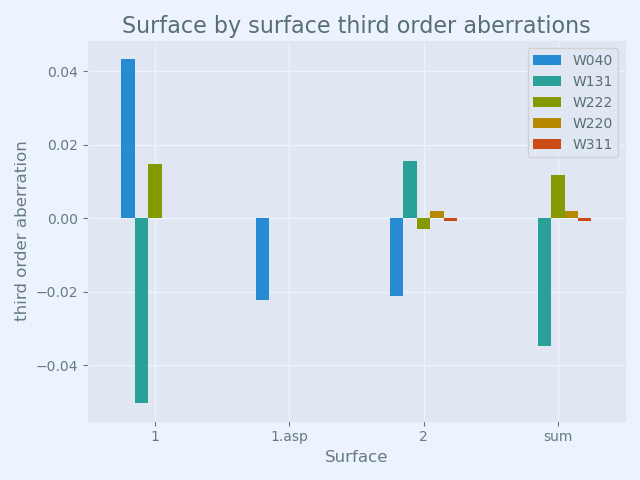

In [39]:
# display bar chart
fig, ax = plt.subplots()
ax.set_xlabel('Surface')
ax.set_ylabel('third order aberration')
ax.set_title('Surface by surface third order aberrations')
wv_df.plot.bar(ax=ax, rot=0)
ax.grid(True)
fig.tight_layout()

# Cassegrain Two Mirror

In [40]:
apply_conics(opm, tcm.cassegrain, pm)

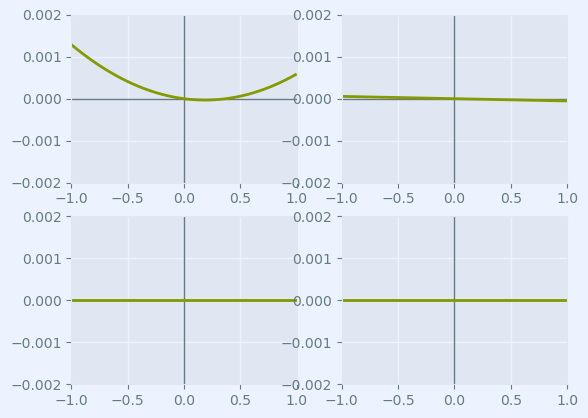

In [41]:
abr_plt.refresh()

In [42]:
opm.save_model('Cassegrain')
sm.list_surfaces()
sm.list_model()

0 Surface(lbl='Obj', profile=Spherical(c=0.0), interact_mode='dummy')
1 Surface(profile=Conic(c=-0.013774104767630852, cc=-1.0), interact_mode='reflect')
2 Surface(profile=Conic(c=-0.0062901746441689655, cc=-39.680801625045284), interact_mode='reflect')
3 Surface(lbl='Img', profile=Spherical(c=0.0), interact_mode='dummy')
              c            t        medium     mode   zdr      sd
  Obj:     0.000000  1.00000e+10       air             1  1.0000e+08
    1:    -0.013774     -14.5200       air    reflect -1      2.5004
    2:    -0.006290      30.0000       air    reflect  1      1.6464
  Img:     0.000000      0.00000                       1     0.50130


In [43]:
# compute 3rd order aberrations
ax_ray, pr_ray, fod = ar['parax_data']
u_last = ax_ray[-1][mc.slp]
central_wv = opm.nm_to_sys_units(sm.central_wavelength())
n_last = pm.sys[-1][mc.indx]
to_df = compute_third_order(opm)

tr_df=to_df.apply(to.seidel_to_transverse_aberration, axis='columns', args=(n_last,u_last))
out = widgets.Output()
wv_df=to_df.apply(to.seidel_to_wavefront, axis='columns', args=(central_wv,))
with out:
    display(to_df)
    display(wv_df)
display(out)

fcv=to.seidel_to_field_curv(to_df.loc['sum'], n_last, fod.opt_inv)

Output()

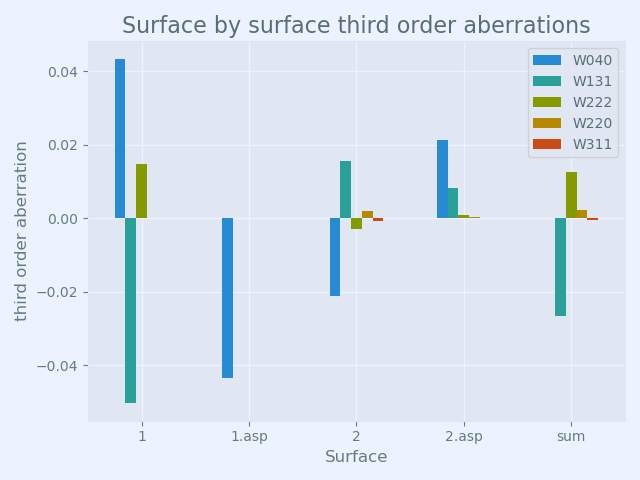

In [44]:
# display bar chart
fig, ax = plt.subplots()
ax.set_xlabel('Surface')
ax.set_ylabel('third order aberration')
ax.set_title('Surface by surface third order aberrations')
wv_df.plot.bar(ax=ax, rot=0)
ax.grid(True)
fig.tight_layout()

# Ritchey-Chretien Two Mirror

In [45]:
apply_conics(opm, tcm.ritchey_chretien, pm)

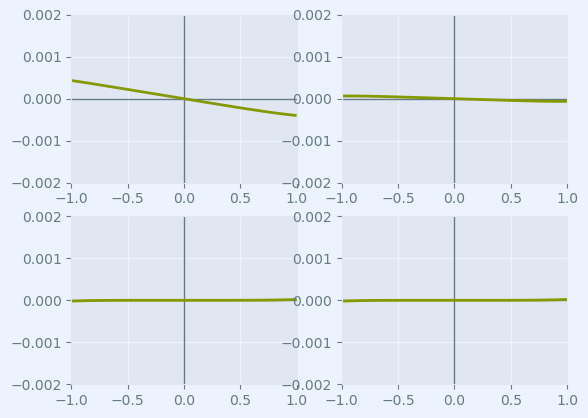

In [46]:
abr_plt.refresh()

In [47]:
opm.save_model('Ritchey_Chretien')
sm.list_surfaces()

0 Surface(lbl='Obj', profile=Spherical(c=0.0), interact_mode='dummy')
1 Surface(profile=Conic(c=-0.013774104767630852, cc=-2.581227956516231), interact_mode='reflect')
2 Surface(profile=Conic(c=-0.0062901746441689655, cc=-167.79330618932846), interact_mode='reflect')
3 Surface(lbl='Img', profile=Spherical(c=0.0), interact_mode='dummy')


In [48]:
# compute 3rd order aberrations
ax_ray, pr_ray, fod = ar['parax_data']
u_last = ax_ray[-1][mc.slp]
central_wv = opm.nm_to_sys_units(sm.central_wavelength())
n_last = pm.sys[-1][mc.indx]
to_df = compute_third_order(opm)

tr_df=to_df.apply(to.seidel_to_transverse_aberration, axis='columns', args=(n_last,u_last))
wv_df=to_df.apply(to.seidel_to_wavefront, axis='columns', args=(central_wv,))
fcv=to.seidel_to_field_curv(to_df.loc['sum'], n_last, fod.opt_inv)

out = widgets.Output()
with out:
    display(to_df)
    display(wv_df)
    display(fcv)
display(out)

Output()

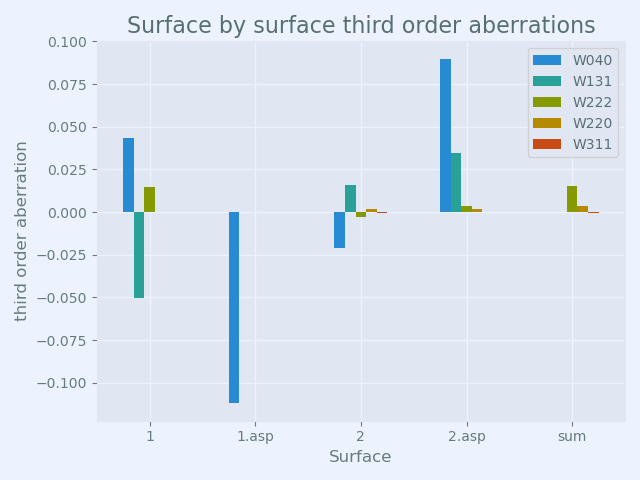

In [49]:
# display bar chart
fig, ax = plt.subplots()
ax.set_xlabel('Surface')
ax.set_ylabel('third order aberration')
ax.set_title('Surface by surface third order aberrations')
wv_df.plot.bar(ax=ax, rot=0)
ax.grid(True)
fig.tight_layout()

In [50]:
wv_df.loc[:, 'W040':'W131']

,W040,W131
1,4.343468e-02,-5.045373e-02
1.asp,-1.121148e-01,-0.000000e+00
2,-2.127257e-02,1.562404e-02
2.asp,8.995271e-02,3.482969e-02
sum,-1.378598e-09,3.459856e-17


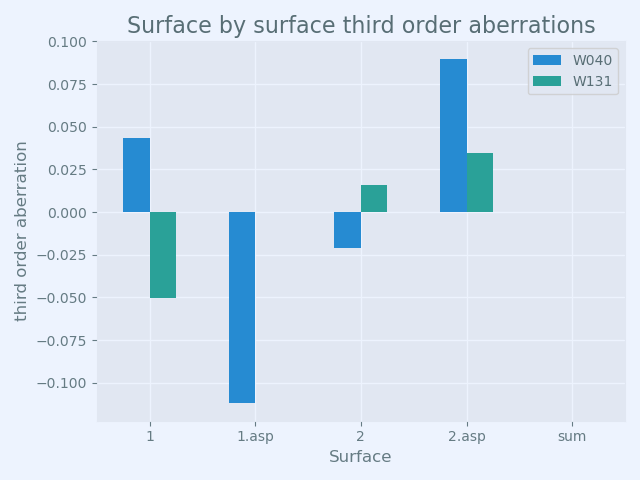

In [51]:
# display bar chart
fig, ax = plt.subplots()
ax.set_xlabel('Surface')
ax.set_ylabel('third order aberration')
ax.set_title('Surface by surface third order aberrations')
wv_df.loc[:, 'W040':'W131'].plot.bar(ax=ax, rot=0)
ax.grid(True)
fig.tight_layout()

# Revert to Two Spherical Mirrors

In [52]:
apply_conics(opm, tcm.spheres, pm)
sm.list_surfaces()

0 Surface(lbl='Obj', profile=Spherical(c=0.0), interact_mode='dummy')
1 Surface(profile=Conic(c=-0.013774104767630852, cc=0.0), interact_mode='reflect')
2 Surface(profile=Conic(c=-0.0062901746441689655, cc=0.0), interact_mode='reflect')
3 Surface(lbl='Img', profile=Spherical(c=0.0), interact_mode='dummy')


In [53]:
fo.list_parax_trace(opm)

stop surface: None
           y           u           n*i         ybar         ubar        n*ibar
 0            0      2.5e-10      2.5e-10       -1e+08         0.01         0.01
 1          2.5    0.0688705   -0.0344353            0        -0.01         0.01
 2          1.5        -0.05   -0.0594353       0.1452    0.0118267    0.0109133
 3  6.66134e-16        -0.05        -0.05          0.5    0.0118267    0.0118267


In [54]:
from rayoptics.elem.profiles import mutate_profile

sm.ifcs[1].profile = mutate_profile(sm.ifcs[1].profile, 'Spherical')
sm.ifcs[2].profile = mutate_profile(sm.ifcs[2].profile, 'Spherical')

In [55]:
sm.list_model()

              c            t        medium     mode   zdr      sd
  Obj:     0.000000  1.00000e+10       air             1  1.0000e+08
    1:    -0.013774     -14.5200       air    reflect -1      2.5004
    2:    -0.006290      30.0000       air    reflect  1      1.6458
  Img:     0.000000      0.00000                       1     0.50261


In [56]:
fo.list_parax_trace(opm)

stop surface: None
           y           u           n*i         ybar         ubar        n*ibar
 0            0      2.5e-10      2.5e-10       -1e+08         0.01         0.01
 1          2.5    0.0688705   -0.0344353            0        -0.01         0.01
 2          1.5        -0.05   -0.0594353       0.1452    0.0118267    0.0109133
 3  6.66134e-16        -0.05        -0.05          0.5    0.0118267    0.0118267


In [57]:
opm.save_model('TwoSphericalMirror')

found new profile in part_tree: M1.p
found new profile in part_tree: M2.p


In [58]:
pm.list_lens()

       ax_ray_ht    ax_ray_slp
 0:            0       2.5e-10
 1:          2.5    -0.0688705
 2:          1.5         -0.05
 3:  6.66134e-16         -0.05

       pr_ray_ht    pr_ray_slp
 0:       -1e+08          0.01
 1:            0          0.01
 2:       0.1452     0.0118267
 3:          0.5     0.0118267

            power           tau        index    type
 0:             0         1e+10      1.00000    dummy
 1:    0.02754821         14.52     -1.00000    reflect
 2:   -0.01258035            30      1.00000    reflect
 3:             0             0      1.00000    dummy


In [59]:
pm.first_order_data()

efl                  50
ffl              -59.13
pp1              -9.133
bfl                  30
ppk                  20
f/#                  10
m                -5e-09
red              -2e+08
obj_dist          1e+10
obj_ang          0.5729
enp_dist             -0
enp_radius          2.5
na obj          2.5e-10
n obj                 1
img_dist             30
img_ht              0.5
exp_dist         -12.28
exp_radius        2.114
na img         -0.04994
n img                 1
optical invariant        0.025


In [60]:
em.list_model()

0: Object (DummyInterface): Surface(lbl='Obj', profile=Spherical(c=0.0), interact_mode='dummy')
1: M1 (Mirror): Mirror: Conic(c=-0.013774104767630852, cc=0.0), t=0.1250, sd=2.5004
2: M2 (Mirror): Mirror: Conic(c=-0.0062901746441689655, cc=0.0), t=0.0823, sd=1.6458
3: Image (DummyInterface): Surface(lbl='Img', profile=Spherical(c=0.0), interact_mode='dummy')


In [61]:
pt.list_tree()

root
├── Object
│   └── p
│       └── i0
├── Object space
│   └── t
│       └── g0
├── M1
│   └── p
│       └── i1
├── AG1
│   └── t
│       └── g1
├── M2
│   └── p
│       └── i2
├── Image space
│   └── t
│       └── g2
└── Image
    └── p
        └── i3


In [62]:
opm_rc = open_model('Ritchey_Chretien.roa')

In [63]:
opm_rc['sm'].list_model()

              c            t        medium     mode   zdr      sd
  Obj:     0.000000  1.00000e+10       air             1  1.0000e+08
    1:    -0.013774     -14.5200       air    reflect -1      2.5004
    2:    -0.006290      30.0000       air    reflect  1      1.6473
  Img:     0.000000      0.00000                       1     0.50044


In [64]:
listobj(opm_rc['sm'].ifcs[1].profile)
listobj(opm_rc['sm'].ifcs[2].profile)

profile: Conic
c=-0.013774104767630852,   r=-72.59999955496201   conic cnst=-2.581227956516231

profile: Conic
c=-0.0062901746441689655,   r=-158.97809783819068   conic cnst=-167.79330618932846

